In [1]:
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"E:\archive\US_Accidents_March23.csv", nrows=50000) #using nrows=50000 because datasetis to long


In [3]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')


In [6]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     50000 non-null  object        
 1   Source                 50000 non-null  object        
 2   Severity               50000 non-null  int64         
 3   Start_Time             50000 non-null  datetime64[ns]
 4   End_Time               50000 non-null  datetime64[ns]
 5   Start_Lat              50000 non-null  float64       
 6   Start_Lng              50000 non-null  float64       
 7   End_Lat                0 non-null      float64       
 8   End_Lng                0 non-null      float64       
 9   Distance(mi)           50000 non-null  float64       
 10  Description            50000 non-null  object        
 11  Street                 50000 non-null  object        
 12  City                   50000 non-null  object        
 13  C

In [7]:
# Check for missing values
print(df.isnull().sum())

ID                           0
Source                       0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                  50000
End_Lng                  50000
Distance(mi)                 0
Description                  0
Street                       0
City                         0
County                       0
State                        0
Zipcode                      7
Country                      0
Timezone                     7
Airport_Code                 7
Weather_Timestamp          266
Temperature(F)             456
Wind_Chill(F)            47503
Humidity(%)                639
Pressure(in)               306
Visibility(mi)             526
Wind_Direction             267
Wind_Speed(mph)           8422
Precipitation(in)        46724
Weather_Condition          603
Amenity                      0
Bump                         0
Crossing                     0
Give_Way

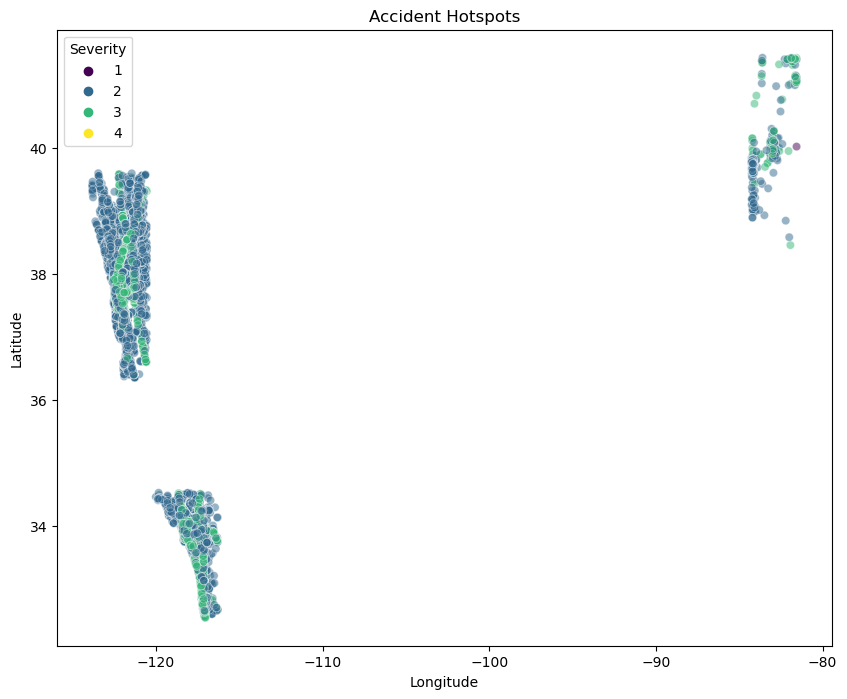

In [8]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Start_Lng', y='Start_Lat', hue='Severity', data=df, palette='viridis', alpha=0.5)
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

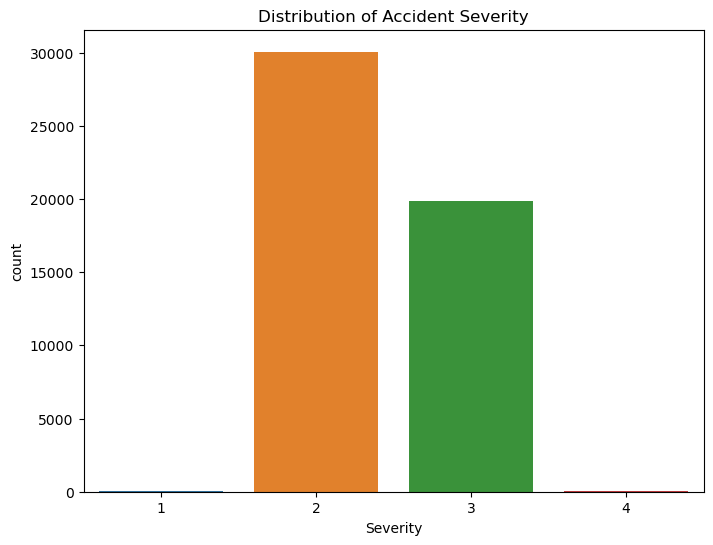

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Severity', data=df)
plt.title('Distribution of Accident Severity')
plt.show()

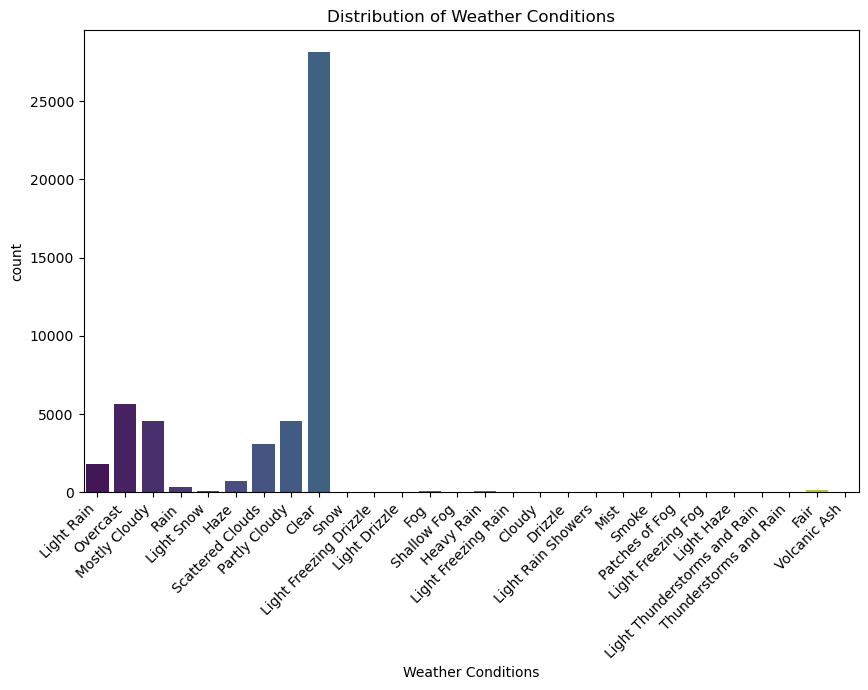

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_Condition', data=df, palette='viridis')
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Conditions')
plt.xticks(rotation=45, ha='right')
plt.show()


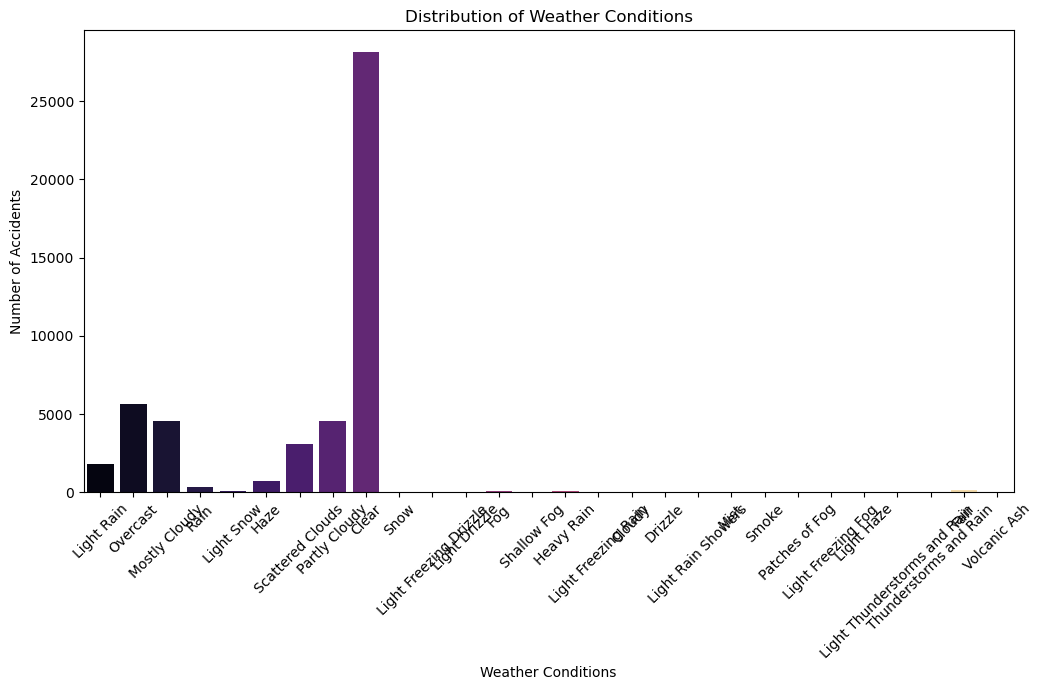

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Weather_Condition', data=df, palette='magma')
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

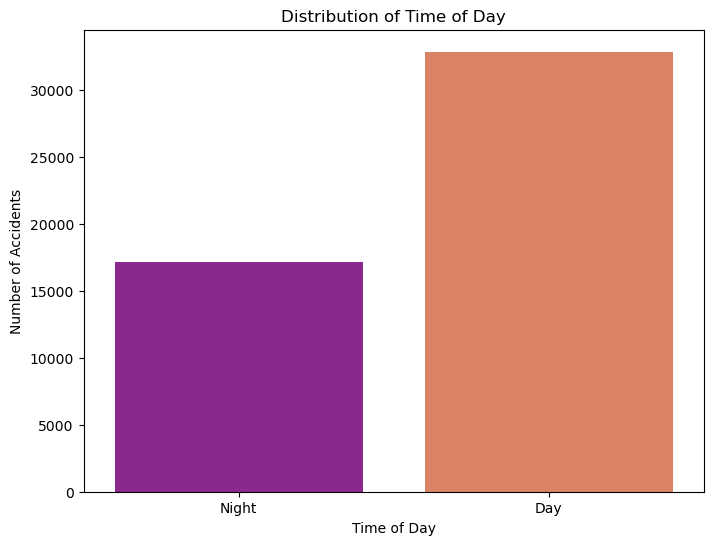

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sunrise_Sunset', data=df, palette='plasma')
plt.title('Distribution of Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()

In [13]:
# Print all column names
print(df.columns)


Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')
